In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.0
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.19.5
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.6.0
keras.api._v2.keras 2.6.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
input_wide=keras.layers.Input(shape=[5])
input_deep=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_deep)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_wide,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_wide,input_deep],
                        outputs=[output])
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [6]:
#wide选的是前面5列，deep选的是后面6列
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
print(x_train_scaled_wide[:5])
print(x_train_scaled_deep[:5])
x_train_scaled_wide=x_train_scaled_wide[:10000]
x_train_scaled_deep=x_train_scaled_deep[:10000]
y_train=y_train[:10000]

[[ 0.80154431  0.27216142 -0.11624393 -0.20231151 -0.54305157]
 [-0.29807281  0.35226166 -0.10920508 -0.25055521 -0.03406402]
 [-0.03058829 -0.92934213  0.25962148 -0.00601274 -0.50040912]
 [ 1.90638325  0.51246213  0.4475828  -0.27672178 -0.63105833]
 [ 3.88017387 -0.92934213  1.29029867 -0.17269133 -0.22550141]]
[[-0.11624393 -0.20231151 -0.54305157 -0.02103962 -0.58976206 -0.08241846]
 [-0.10920508 -0.25055521 -0.03406402 -0.006034    1.08055484 -1.06113817]
 [ 0.25962148 -0.00601274 -0.50040912 -0.03077987  1.59844639 -1.81515182]
 [ 0.4475828  -0.27672178 -0.63105833 -0.07081147 -0.7064043   0.74649722]
 [ 1.29029867 -0.17269133 -0.22550141  0.0514101  -0.84637499  0.88631432]]


In [7]:
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    y_train,
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
313/313 [==============================] - 0s 649us/step - loss: 1.0608 - val_loss: 0.7583
Epoch 2/100
313/313 [==============================] - 0s 439us/step - loss: 0.6689 - val_loss: 0.5024
Epoch 3/100
313/313 [==============================] - 0s 423us/step - loss: 0.4635 - val_loss: 0.5348
Epoch 4/100
313/313 [==============================] - 0s 426us/step - loss: 0.4470 - val_loss: 0.4618
Epoch 5/100
313/313 [==============================] - 0s 444us/step - loss: 0.4210 - val_loss: 0.456

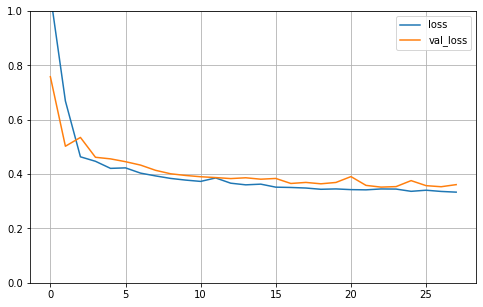

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [9]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test, verbose=0)

0.3600371778011322